# Dataset

## Creation of the dataset

In [5]:
import numpy as np

def squared(x):
    return pow(x,2)

n_data = 10000
dataset = np.zeros((n_data,2))

for i in range(n_data):
    x = np.random.uniform(1,10)
    dataset[i]=[x, squared(x)] 

min_max = np.zeros((2,2))
min_max[0] = np.min(dataset[:], axis=0)
min_max[1] = np.max(dataset[:], axis=0)

print(min_max)
dataset = (dataset-min_max[0])/(min_max[1]-min_max[0])
dataset = dataset.astype(np.float32)

[[ 1.00126221  1.00252602]
 [ 9.99982311 99.99646232]]


## Distribution visualization

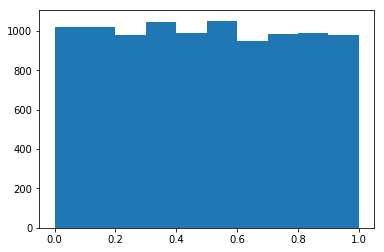

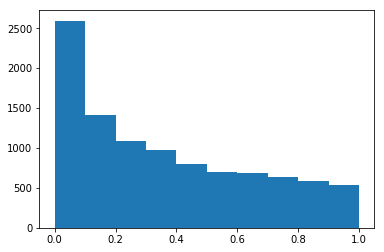

In [6]:
import matplotlib.pyplot as plt

plt.hist(dataset[:,0])
plt.show()
plt.hist(dataset[:,1])
plt.show()

# Chainer 

## model

In [7]:
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import report

class MLP(chainer.Chain):
    def __init__(self):
        super(MLP, self).__init__(
            l1=L.Linear(1, 100),
            l3=L.Linear(100, 1),
        )
        
    def __call__(self, x, y):
        h = F.relu(self.l1(x))
        h = self.l3(h)
        loss = F.mean_squared_error(h, y)
        report({'loss': loss}, self)
        return loss
    
    def predict(self, x):
        h = F.relu(self.l1(x))
        h = self.l3(h)
        return h

## Training

In [28]:
from chainer import iterators, optimizers, serializers, report, training
from chainer.datasets import TupleDataset
from chainer.training import extensions

nn = MLP()
print(dataset[:9500,0:1].shape)
print(dataset[:9500,0].shape)
print(dataset[:9500].shape)
train = TupleDataset(dataset[:9500,0:1],dataset[:9500,1:2])
val = TupleDataset(dataset[9500:,0:1],dataset[9500:,1:2])

max_epoch = 50
batchsize = 40

train_iter = iterators.SerialIterator(train, batchsize)
val_iter = iterators.SerialIterator(val, batchsize, False, False)

optimizer = optimizers.Adam()
optimizer.setup(nn)

updater = training.updaters.StandardUpdater(train_iter, optimizer)
trainer = training.Trainer(updater, (max_epoch, 'epoch'))

trainer.extend(extensions.LogReport())
trainer.extend(extensions.Evaluator(val_iter, nn))
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss']))

trainer.run()

(9500, 1)
(9500,)
(9500, 2)
epoch       main/loss   validation/main/loss
1           0.00602713  0.00319329            
2           0.00254651  0.00205277            
3           0.00136115  0.000850299           
4           0.000489398  0.000261423           
5           0.000159517  0.000100711           
6           6.48171e-05  4.53602e-05           
7           3.12656e-05  2.34414e-05           
8           1.66781e-05  1.24741e-05           
9           9.96911e-06  8.44513e-06           
10          6.59115e-06  5.75394e-06           
11          4.35224e-06  3.15616e-06           
12          3.01213e-06  3.41769e-06           
13          2.31401e-06  1.52056e-06           
14          1.63662e-06  1.35645e-06           
15          1.24625e-06  1.9514e-06            
16          1.02971e-06  7.46429e-07           
17          8.88099e-07  5.49958e-07           
18          6.68314e-07  7.87777e-07           
19          4.91807e-07  5.25211e-07           
20          5.2931

# Testing

In [ ]:
x = np.linspace(1,10,100)
y = squared(x)

input_data = np.zeros((100,1))
for i in range(100):
    input_data[i] = x[i]

input_data = (input_data-min_max[0,0])/(min_max[1,0]-min_max[0,0])
input_data = input_data.astype(np.float32)

y_pred_norm = nn.predict(input_data)
y_pred = y_pred_norm*(min_max[1,1]-min_max[0,1])+min_max[0,1]


plt.plot(x,y)
plt.plot(x,y_pred.data)
plt.show()